# Assessing & Exploring 
Use [README file](http://www.fueleconomy.gov/feg/epadata/Readme.txt) or [This pdf](http://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf) to know more abou the datasets and columns\
Explore `all_alpha_08.csv` and `all_alpha_18.csv` and the questions below.

In [134]:
# 1- number of samples in each dataset?
# 2- number of columns in each dataset? 
# 3- duplicate rows in each dataset? 
# 4- number of features with missing values in both datasets?
# 5- datatypes of columns in each dataset ?
# 6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
#           
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)?
# 8- how is the column "cyl" different in both datasets? (checkbox)
#                  A- Datatype  B- Number of unique value C- No of samples
# 9- What are the types of fuel present in each dataset ?
# 10- What are the fuel types that exist in a dataset and not the other? 

In [135]:
# import
import numpy as np
import pandas as pd
df_08 = pd.read_csv('all_alpha_08.csv')
df_18 = pd.read_csv('all_alpha_18.csv')

In [136]:
# 1- number of samples and columns in each dataset? 
print("Number of samples and columns in all_alpha_08.csv: ", df_08.shape)
print("Number of samples and columns in all_alpha_18.csv: ", df_18.shape)

Number of samples and columns in all_alpha_08.csv:  (2404, 18)
Number of samples and columns in all_alpha_18.csv:  (1611, 18)


In [137]:
# 3- duplicate rows in each dataset?
print(df_08.duplicated().sum())
print(df_18.duplicated().sum())


25
0


In [138]:
# 4- number of features with missing values in 2008?
print(df_08.isnull().sum().sum())

1685


In [139]:
# 4- number of features with missing values in 2018?
print(df_18.isnull().sum().sum())

4


In [140]:
# 5- datatypes of columns in each dataset ?
print(df_08.dtypes)
print(df_18.dtypes)

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object
Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 o

In [141]:
#6- How many columns are different from each other (that do not share the same datatype) [type the name of columns]?
# Get the set of column names for each DataFrame
df_08_cols = set(df_08.columns)
df_18_cols = set(df_18.columns)

# Find columns that exist in both DataFrames
common_cols = df_08_cols.intersection(df_18_cols)

# Find columns with different datatypes
diff_cols = []
for col in common_cols:
    if df_08[col].dtype != df_18[col].dtype:
        diff_cols.append(col)

# Print the number and names of columns with different datatypes
print(f"There are {len(diff_cols)} columns with different datatypes:")
print(diff_cols)

There are 3 columns with different datatypes:
['Cyl', 'Greenhouse Gas Score', 'Air Pollution Score']


In [142]:
# 7- number of non-null unique values for features in each dataset for each column (do not type anything just the code)
print(df_08.nunique(dropna=False))
print(df_18.nunique(dropna=False))

Model                   436
Displ                    47
Cyl                       9
Trans                    15
Drive                     3
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              3
City MPG                 40
Hwy MPG                  44
Cmb MPG                  39
Unadj Cmb MPG           722
Greenhouse Gas Score     21
SmartWay                  2
dtype: int64
Model                   367
Displ                    37
Cyl                       8
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO

In [143]:
# 8- how is the column "Cyl" different in both datasets?
print("Unique values of 'Cyl' column in 2008 dataset:", df_08['Cyl'].unique())
print("Unique values of 'Cyl' column in 2018 dataset:", df_18['Cyl'].unique())


Unique values of 'Cyl' column in 2008 dataset: ['(6 cyl)' '(4 cyl)' '(12 cyl)' '(8 cyl)' '(10 cyl)' '(16 cyl)' '(5 cyl)'
 nan '(2 cyl)']
Unique values of 'Cyl' column in 2018 dataset: [ 6.  4.  5. 12. 16.  8. nan  3.]


In [144]:
# 9- What are the types of fuel present in each dataset ?
print("Types of fuel present in 2008 dataset:", df_08['Fuel'].unique())


Types of fuel present in 2008 dataset: ['Gasoline' 'ethanol/gas' 'ethanol' 'diesel' 'CNG']


In [145]:
# 10- What are the types of fuel present in each dataset ?
print("Types of fuel present in 2018 dataset:", df_18['Fuel'].unique())


Types of fuel present in 2018 dataset: ['Gasoline' 'Gasoline/Electricity' 'Diesel' 'Ethanol/Gas' 'Electricity']


# Cleaning

## Cleaning - Column Labels

Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.

Columns to Drop:\
From 2008 dataset: 'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'\
From 2018 dataset: 'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'

In [146]:
# drop the columns from 2008
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)


In [147]:
# drop the columns from 2018
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)


## Cleaning -  Rename Columns
**Change the "Sales Area" column label in the 2008 dataset to "Cert Region" for consistency.**\
**Rename all column labels to replace spaces with underscores and convert everything to lowercase.**\
(Underscores can be much easier to work with in Python than spaces.\
For example, having spaces wouldn't allow you to use df.column_name instead of df['column_name'] to select columns or use query().\
Being consistent with lowercase and underscores also helps make column names easy to remember.)

In [148]:
# rename the column
df_08.rename(columns={'Sales Area': 'Cert Region'}, inplace=True)


In [149]:
# fix columns in both datasets
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)


In [150]:
# confirm that both datasets share the exact column names:
print(df_08.columns == df_18.columns)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [151]:
# save the new datasets as "data_08_v1.csv" and 'data_18_v1.csv'.
df_08.to_csv('data_08_v1.csv', index=False)
df_18.to_csv('data_18_v1.csv', index=False)


## Cleaning - Filter, Drop Nulls, Dedupe
For consistency, only compare cars certified by California standards.\
Filter both datasets using query to select only rows where "cert_region" is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

Use `data_08_v1.csv` and `data_18_v1.csv` that you just saved


### Filter by Certification Region

In [ ]:
# filter datasets for rows following California standards using query
df_08_v1 = df_08_v1.query('cert_region == "CA"')
df_18_v1 = df_18_v1.query('cert_region == "CA"')

In [ ]:
# confirm only certification region is California
print(df_08_v1['cert_region'].unique())  # output: ['CA']
print(df_18_v1['cert_region'].unique())  # output: ['CA']


In [ ]:
# drop certification region columns form both datasets
df_08_v1.drop('cert_region', axis=1, inplace=True)
df_18_v1.drop('cert_region', axis=1, inplace=True)


### Drop Rows with Missing Values

In [ ]:
# drop rows with any null values in both datasets
df_08_v1.dropna(inplace=True)
df_18_v1.dropna(inplace=True)

In [ ]:
# checks if any of the columns have null values
print(df_08_v1.isnull().sum())
print(df_18_v1.isnull().sum())

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64
model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64


### Dedupe Data

In [ ]:
# print number of duplicates in 2008 and 2018 datasets
print(sum(df_08_v1.duplicated()))
print(sum(df_18_v1.duplicated()))

23
3


In [ ]:
# drop duplicates in both datasets
df_08_v1.drop_duplicates(inplace=True)
df_18_v1.drop_duplicates(inplace=True)


In [ ]:
# confirm your changes
print(sum(df_08_v1.duplicated()))
print(sum(df_18_v1.duplicated()))


0
0


In [ ]:
# check the shape of each dataset -- if the 2008 size isn't (986,13) and 2018 (794,13), you should probably cry.
print(df_08_v1.shape)
print(df_18_v1.shape)

(986, 13)
(794, 13)


In [ ]:
# make a checkpoint in case you mess up anything later
df_08_v1.to_csv('data_08_v1_check.csv', index=False)
df_18_v1.to_csv('data_18_v1_check.csv', index=False)

## Cleaning - Fixing Data Types


### Fixing `cyl` Data Type
- 2008: extract int from string
- 2018: convert float to int

In [ ]:
# extract int from string in cyl in the 2008 dataset
df_08_v1['cyl'] = df_08_v1['cyl'].str.extract('(\d+)').astype(int)

In [ ]:
# convert the data type of the "cyl" column in the 2018 dataset from float to int 
df_18_v1['cyl'] = df_18_v1['cyl'].astype(int)

In [ ]:
# verify that the data type of the column in both datasets is "int"
print(df_08_v1['cyl'].dtype)
print(df_18_v1['cyl'].dtype)

int32
int32


### Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [ ]:
# try to change the data type to float
# print(df_08_v1['air_pollution_score'].unique())
# print(df_18_v1['air_pollution_score'].unique())
df_08_v1['air_pollution_score'] = df_08['air_pollution_score'].astype(float)
df_18_v1['air_pollution_score'] = df_18['air_pollution_score'].astype(float)


ValueError: could not convert string to float: '7/7'

In [ ]:
# you should have faced an error, get the row that caused that error
df_08_v1.loc[df_08_v1['air_pollution_score'] == '7/7']

Empty DataFrame
Columns: [model, displ, cyl, trans, drive, fuel, veh_class, air_pollution_score, city_mpg, hwy_mpg, cmb_mpg, greenhouse_gas_score, smartway]
Index: []

# It's not just the air pollution score!
The cars that have more than one type of fuel in a single row are hybrid (run on more than one type of fuel)! Multiple columns will be affected too!\
    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."\
This is why you can see that multiple columns contain more than one value


In [ ]:
# You have two options here: (1) Split the row by "/" into two rows, (2) just drop the rows that contain the ("/") in any of the columns
# You will lose a point for each dataset if you go with the second option

In [ ]:
# to split the rows---->
# 1- get the rows that contain / in the fuel column
# 2- make two copies of these rows
# 3- get a list of all columns that are affected (you can get them by looking at any row of the hybrid cars)
# 4- split the the row by / to two rows (one for each copy) for EACH COLUMN --> first copy should store the value before the / and the second one should store the one after the /  
# 5- drop the original row from the dataset
# 6- append the newely created rows to the original dataframe
# 7- repeat the process for each dataset (the list of columns will change in the 2018 set)

This is the row before splitting\
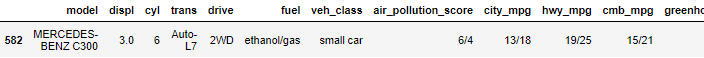

This what it should look like after splitting\
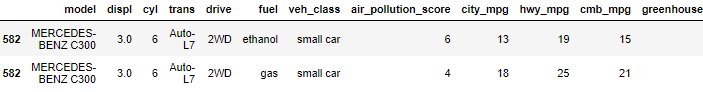

In [ ]:
# Get rows that contain "/" in the fuel column in the 2008 dataset
split_08 = df_08_clean[df_08_clean['fuel'].str.contains('/')]
# Make two copies of the rows with "/" in the 2008 dataset
copy1_08 = split_08.copy()
copy2_08 = split_08.copy()
# Get a list of columns affected by hybrid cars in the 2008 dataset
split_cols_08 = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
# Split the rows by "/" into two rows for each affected column in the 2008 dataset
for col in split_cols_08:
    copy1_08[col] = split_08[col].apply(lambda x: x.split('/')[0])
    copy2_08[col] = split_08[col].apply(lambda x: x.split('/')[1])
# Drop the original rows from the 2008 dataset
df_08_clean.drop(split_08.index, inplace=True)
# Append the newly created rows to the 2008 dataset
df_08_clean = df_08_clean.append(copy1_08, ignore_index=True)
df_08_clean = df_08_clean.append(copy2_08, ignore_index=True)
# Get rows that contain "/" in the fuel column in the 2018 dataset
split_18 = df_18_clean[df_18_clean['fuel'].str.contains('/')]
# Make two copies of the rows with "/" in the 2018 dataset
copy1_18 = split_18.copy()
copy2_18 = split_18.copy()
# Get a list of columns affected by hybrid cars in the 2018 dataset
split_cols_18 = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
# Split the rows by "/" into two rows for each affected column in the 2018 dataset
for col in split_cols_18:
    copy1_18[col] = split_18[col].apply(lambda x: x.split('/')[0])
    copy2_18[col] = split_18[col].apply(lambda x: x.split('/')[1])
# Drop the original rows from the 2018 dataset
df_18_clean.drop(split_18.index, inplace=True)
# Append the newly created rows to the 2018 dataset
df_18_clean = df_18_clean.append(copy1_18, ignore_index=True)
df_18_clean = df_18_clean.append(copy2_18, ignore_index=True)
# Check that there are no hybrid cars in the 2008 dataset anymore
print(df_08_clean[df_08_clean['fuel'].str.contains('/')])
# Check that there are no hybrid cars in the 2018 dataset anymore
print(df_18_clean[df_18_clean['fuel'].str.contains('/')])

In [ ]:
# get the rows that contain '/' in the fuel column
hybrid_08 = df_08_v1[df_08_v1.fuel.str.contains('/')]
hybrid_18 = df_18_v1[df_18_v1.fuel.str.contains('/')]

# make copies of the hybrid rows
df1_08 = hybrid_08.copy() # data for the first fuel type
df2_08 = hybrid_08.copy() # data for the second fuel type

df1_18 = hybrid_18.copy() # data for the first fuel type
df2_18 = hybrid_18.copy() # data for the second fuel type

# list of columns that have to be split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataset copy
for c in split_columns:
    df1_08[c] = hybrid_08[c].apply(lambda x: x.split('/')[0])
    df2_08[c] = hybrid_08[c].apply(lambda x: x.split('/')[1])
    
    df1_18[c] = hybrid_18[c].apply(lambda x: x.split('/')[0])
    df2_18[c] = hybrid_18[c].apply(lambda x: x.split('/')[1])
    
# drop the original hybrid rows from each dataset
df_08_v1.drop(hybrid_08.index, inplace=True)
df_18_v1.drop(hybrid_18.index, inplace=True)

# append the new dataset copies to the original dataset
df_08_v1 = df_08_v1.append(df1_08.append(df2_08))
df_18_v1 = df_18_v1.append(df1_18.append(df2_18))

# reset the index of the new dataset
df_08_v1.reset_index(drop=True, inplace=True)
df_18_v1.reset_index(drop=True, inplace=True)

# check that there are no hybrid cars in the 2008 dataset anymore
print(df_08_v1[df_08_v1.fuel.str.contains('/')])


In [ ]:
# check that there are no hybrid cars in the 2008 dataset anymore:
df_08_v1[df_08_v1['fuel'].str.contains('/')]

Empty DataFrame
Columns: [model, displ, cyl, trans, drive, fuel, veh_class, air_pollution_score, city_mpg, hwy_mpg, cmb_mpg, greenhouse_gas_score, smartway]
Index: []

### Repeat this process for the 2018 dataset

In [ ]:
# do whatever you did in the previous cells
# get rows with '/' in the fuel column
hybrid_18 = df_18[df_18['fuel'].str.contains('/')].copy()
# make two copies of these rows
df1_18 = hybrid_18.copy()
df2_18 = hybrid_18.copy()
# get a list of all columns that are affected
cols = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
# convert integer columns to string columns
for c in cols:
    if df_18[c].dtype == 'int':
        df_18[c] = df_18[c].astype(str)
# split the row by / to two rows (one for each copy) for EACH COLUMN
for c in cols:
    df1_18[c] = hybrid_18[c].apply(lambda x: str(x).split('/')[0])
    df2_18[c] = hybrid_18[c].apply(lambda x: str(x).split('/')[1] if len(str(x).split('/')) > 1 else '')
# drop the original hybrid rows from each dataset
df_18_v1 = df_18.drop(hybrid_18.index)
# append the newly created rows to the original dataframe
df_18_v2 = df1_18.append(df2_18)
# concatenate the two datasets
df_18_v3 = df_18_v1.append(df_18_v2)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_21324\3300727178.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18_v2 = df1_18.append(df2_18)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_21324\3300727178.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18_v3 = df_18_v1.append(df_18_v2)


In [ ]:
# now, try to change the data type again

# for 2008, convert string to float
df_08_v1.loc[df_08_v1['greenhouse_gas_score'] == '7/6', 'greenhouse_gas_score'] = (7 + 6) / 2
df_08_v1['greenhouse_gas_score'] = df_08_v1['greenhouse_gas_score'].astype(float)
# for 2018, convert int to float
df_18_v3['greenhouse_gas_score'] = df_18_v3['greenhouse_gas_score'].replace('', np.nan)
df_18_v3['greenhouse_gas_score'] = df_18_v3['greenhouse_gas_score'].astype(float)
df_08_v3 = df_08_v1

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [ ]:
# check the data type of the columns
print(df_08_v3.dtypes)
print(df_18_v3.dtypes)

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score    float64
smartway                 object
dtype: object
model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score    float64
smartway                 object
dtype: object


In [ ]:
# convert to float
df_08_v3['city_mpg'] = df_08_v3['city_mpg'].astype(float)
df_08_v3['hwy_mpg'] = df_08_v3['hwy_mpg'].astype(float)
df_08_v3['cmb_mpg'] = df_08_v3['cmb_mpg'].astype(float)

df_18_v3['city_mpg'] = df_18_v3['city_mpg'].astype(float)
df_18_v3['hwy_mpg'] = df_18_v3['hwy_mpg'].astype(float)
df_18_v3['cmb_mpg'] = df_18_v3['cmb_mpg'].astype(float)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [ ]:
# convert the data type from float to int in the 2008 dataset
df_08_v3['greenhouse_gas_score'] = df_08_v3['greenhouse_gas_score'].astype(int)

In [ ]:
#### check that all columns and their data type in the 2008 dataset matches excatly the ones in the 2018 dataset
#### all columns MUST be the same data type


In [ ]:
# check the shape of both datasets

In [ ]:
# Save your final CLEAN datasets as "clean_08.csv" and "clean_18.csv"